# 2

By using Python Notebooks on Canvas, split your diabetes data into two parts for training and testing purposes. Namely,
reserve last 10 rows of the diabetes_train.csv for the test set. Then fit a SVM classifier on the bigger portion of this data
and test it on these 10 rows you had reserved. Please feel free to modify existing codes. Notice that you’re not going to
read diabetes_test.csv anymore since you’re going to split the bigger data. Please submit your Python code and your
prediction results. (25pts)

In [2]:
from sklearn import svm
import pandas as pd
import numpy as np

C=1e+03
gamma=1e-05
clf = svm.SVC(C=C, gamma=gamma, kernel='rbf', probability=True)

In [14]:
import pandas as pd
train = pd.read_csv('/content/diabetes_train.csv') #this is our dataset, please change the path for your case
test = train.iloc[-10:]
train = train.iloc[:-10]

In [15]:
train

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
743,9,140,94,0,0,32.7,0.734,45,tested_positive
744,13,153,88,37,140,40.6,1.174,39,tested_negative
745,12,100,84,33,105,30.0,0.488,46,tested_negative
746,1,147,94,41,0,49.3,0.358,27,tested_positive


In [16]:
test

,preg,plas,pres,skin,insu,mass,pedi,age,class
748,3,187,70,22,200,36.4,0.408,36,tested_positive
749,6,162,62,0,0,24.3,0.178,50,tested_positive
750,4,136,70,0,0,31.2,1.182,22,tested_positive
751,1,121,78,39,74,39.0,0.261,28,tested_negative
752,3,108,62,24,0,26.0,0.223,25,tested_negative
753,0,181,88,44,510,43.3,0.222,26,tested_positive
754,8,154,78,32,0,32.4,0.443,45,tested_positive
755,1,128,88,39,110,36.5,1.057,37,tested_positive
756,7,137,90,41,0,32.0,0.391,39,tested_negative
757,0,123,72,0,0,36.3,0.258,52,tested_positive


In [22]:
clf = clf.fit(train.iloc[:,:len(train.columns)-1], train.iloc[:,8]) #first paramater data, second labels
y_pred = clf.predict(test.iloc[:,:len(train.columns)-1]) #doing prediction on unknown test set
y_pred

array(['tested_positive', 'tested_positive', 'tested_negative',
       'tested_negative', 'tested_negative', 'tested_positive',
       'tested_positive', 'tested_negative', 'tested_negative',
       'tested_negative'], dtype=object)

In [30]:
from sklearn.metrics import confusion_matrix #let's see how good we did
y_true = test.iloc[:,8]
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print("\tP. Positive\tP. Negative\n\n\nA. Positive\tTP: {}\tFN: {}\n\n\nA. Negative\tFP: {}\tTN: {}".format(tp, fn, fp, tn))

	P. Positive	P. Negative


A. Positive	TP: 4	FN: 3


A. Negative	FP: 0	TN: 3


In [37]:
print("It predicted {0:.1%} correctly!".format((tn + tp)/confusion_matrix(y_true, y_pred).ravel().sum()))

It predicted 70.0% correctly!


# Pretty good result! 70%

In [31]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from scipy import interp

y = test.iloc[:,8]
scores = clf.predict_proba(test.iloc[:,0:8])
scores[:,1]
fpr, tpr, thresholds = roc_curve(y, scores[:,1], pos_label='tested_positive')
roc_auc = auc(fpr,tpr)

fpr

tpr

thresholds

array([1.87196993, 0.87196993, 0.42516967, 0.39883603, 0.28922554,
       0.17634286])

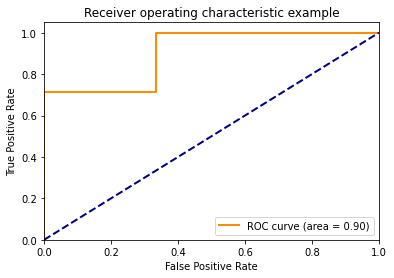

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# 3. Please use the data shown for questions below. (25pts)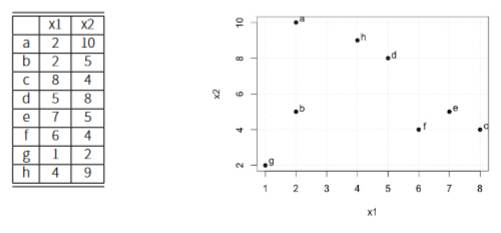

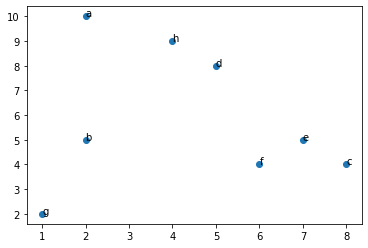

In [39]:
dataLabels = ["a","b","c","d","e","f","g","h"]
dataX1 = [2,2,8,5,7,6,1,4]
dataX2 = [10,5,4,8,5,4,2,9]
fig, ax = plt.subplots()
ax.scatter(dataX1, dataX2)

for i, txt in enumerate(dataLabels):
    ax.annotate(txt, (dataX1[i], dataX2[i]))

1. If h and c are selected as the initial centers for your k-means clustering, assign memberships for other points, and
compute the means (centroids) of your initial clusters. You can use Manhattan distance.

In [48]:
coords = []
for i, x in enumerate(dataX1):
    coords.append([x, dataX2[i]])

In [49]:
coords

[[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]]

In [66]:
def kMeansMHDist(centers, points):
    classes = []
    for point in points:
        distances = []
        for center in centers:
            distances.append(abs(center[0]-point[0])+abs(center[1]-point[1]))
        classes.append(distances.index(min(distances)))
    return classes

In [67]:
centers = [[8,4], [4,9]]
kMeansMHDist(centers, coords)

[1, 1, 0, 1, 0, 0, 0, 1]

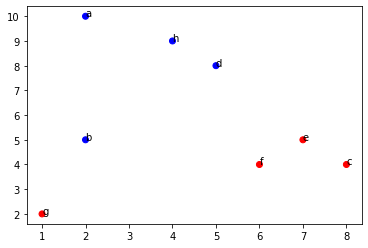

In [73]:
color1 = (1, 0, 0, 1.0)
color2 = (0, 0, 1, 1.0)
colormap = np.array([color1, color2])

fig, ax = plt.subplots()
ax.scatter(dataX1, dataX2, c=colormap[np.array(kMeansMHDist(centers, coords))])

for i, txt in enumerate(dataLabels):
    ax.annotate(txt, (dataX1[i], dataX2[i]))

In [78]:
blue = []
red = []
for i, clss in enumerate(kMeansMHDist(centers, coords)):
    if(clss == 0):
        red.append(coords[i])
    else:
        blue.append(coords[i])
groups = [red, blue]

In [79]:
print(red, blue)

[[8, 4], [7, 5], [6, 4], [1, 2]] [[2, 10], [2, 5], [5, 8], [4, 9]]


In [90]:
def calcCentroid(groups):
    centroidCoords = []
    for group in groups:
        sums = [ sum(row[i] for row in group) for i in range(len(group[0])) ]
        centroidCoords.append([sums[0]/len(group), sums[1]/len(group)])
    return centroidCoords

centroids = calcCentroid(groups)

<ipython-input-96-d7eaf661f38b>:8: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids[0][0], centroids[0][1], c=colormap[0], marker='+')
<ipython-input-96-d7eaf661f38b>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids[1][0], centroids[1][1], c=colormap[1], marker='+')


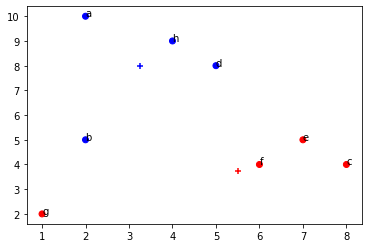

In [96]:
color1 = (1, 0, 0, 1.0)
color2 = (0, 0, 1, 1.0)
colormap = np.array([color1, color2])

fig, ax = plt.subplots()
ax.scatter(dataX1, dataX2, c=colormap[np.array(kMeansMHDist(centers, coords))])

ax.scatter(centroids[0][0], centroids[0][1], c=colormap[0], marker='+')
ax.scatter(centroids[1][0], centroids[1][1], c=colormap[1], marker='+')

for i, txt in enumerate(dataLabels):
    ax.annotate(txt, (dataX1[i], dataX2[i]))

In [97]:
newCat = kMeansMHDist(centroids, coords)
newCat

[1, 1, 0, 1, 0, 0, 0, 1]

<ipython-input-99-4cd7025575ea>:4: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids[0][0], centroids[0][1], c=colormap[0], marker='+')
<ipython-input-99-4cd7025575ea>:5: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(centroids[1][0], centroids[1][1], c=colormap[1], marker='+')


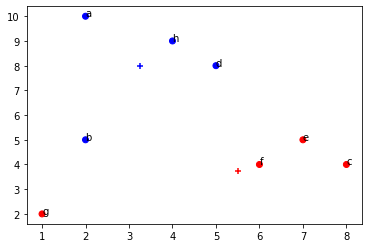

In [99]:
fig, ax = plt.subplots()
ax.scatter(dataX1, dataX2, c=colormap[np.array(newCat)])

ax.scatter(centroids[0][0], centroids[0][1], c=colormap[0], marker='+')
ax.scatter(centroids[1][0], centroids[1][1], c=colormap[1], marker='+')

for i, txt in enumerate(dataLabels):
    ax.annotate(txt, (dataX1[i], dataX2[i]))

# I did not notice a difference, did I do something wrong? It looks fine